In [1]:
%matplotlib inline
import mysql.connector as mysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
cnx = mysql.connect(user='root', password='galletas',
                              host='127.0.0.1',
                              database='iqblade')

In [3]:
cursor = cnx.cursor(named_tuple=True)

In [4]:
query = (
"Select * "
"from data_financials_2015"
)

In [5]:
cursor.execute(query,10)
data = cursor.fetchall()
cnx.close()

In [6]:
d = pd.DataFrame(data)
d.head()

,primary_type_id,financial_year,turnover,export,cost_of_sales,gross_profit,wages_and_salaries,director_emoluments,operating_profit,depreciation,...,operating_costs_per_employee,operating_profit_pct,profit_after_tax_per_employee,gross_profit_pct,profit_after_tax_pct,profit_after_tax_as_pct_operating_costs,organisation_id,difference,revenue_growth_pct,dividends
0,ISV,2015,17250000.0,1917000.0,3446000.0,13804000.0,9721000.0,NaN,530000.0,139000.0,...,51449.0,3.07,8965.0,80.02,13.41,17.43,186,None,NaN,None
1,ISV,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27849.0,...,NaN,None,NaN,None,None,None,360,None,NaN,None
2,ISV,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,NaN,None,None,None,363,None,NaN,None
3,ISV,2015,97610634.0,2160595.0,NaN,NaN,39934432.0,1155734.0,27238314.0,6740819.0,...,NaN,27.91,16987.0,None,19.98,None,364,None,NaN,None
4,ISV,2015,8168344.0,NaN,740142.0,7428202.0,6571335.0,431243.0,NaN,55669.0,...,NaN,-12.24,NaN,90.94,-9.95,None,365,None,NaN,None


What to do with the values that have **`Nan`** and **`None`**? What types are the columns?  
Apparently the `None` values is a pandas dataframe value for null values in object type columns. `Nan` values might be the same but for numeric only. 

In [7]:
# This column has None values
d.difference.isnull().sum()

2060

In [8]:
# This column has NaN
d.turnover.isnull().mean()

0.65000000000000002

In [9]:
y = d.primary_type_id
d.drop('primary_type_id', axis = 1, inplace= True)

In [10]:
d.set_index(d.organisation_id, inplace= True)
d.drop('organisation_id', axis = 1, inplace= True)
d.drop('financial_year', axis = 1, inplace= True)

In [11]:
d.head()

,turnover,export,cost_of_sales,gross_profit,wages_and_salaries,director_emoluments,operating_profit,depreciation,auditfees,interest_payments,...,operating_costs_as_pct_gp,operating_costs_per_employee,operating_profit_pct,profit_after_tax_per_employee,gross_profit_pct,profit_after_tax_pct,profit_after_tax_as_pct_operating_costs,difference,revenue_growth_pct,dividends
organisation_id,,,,,,,,,,,,,,,,,,,,,
186,17250000.0,1917000.0,3446000.0,13804000.0,9721000.0,NaN,530000.0,139000.0,35000.0,108000.0,...,96.16,51449.0,3.07,8965.0,80.02,13.41,17.43,None,NaN,None
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27849.0,NaN,NaN,...,None,NaN,None,NaN,None,None,None,None,NaN,None
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,NaN,None,NaN,None,None,None,None,NaN,None
364,97610634.0,2160595.0,NaN,NaN,39934432.0,1155734.0,27238314.0,6740819.0,30000.0,184024.0,...,None,NaN,27.91,16987.0,None,19.98,None,None,NaN,None
365,8168344.0,NaN,740142.0,7428202.0,6571335.0,431243.0,NaN,55669.0,13829.0,NaN,...,None,NaN,-12.24,NaN,90.94,-9.95,None,None,NaN,None


In [12]:
# Recast as numeric values
d[d.columns[d.dtypes == 'object']] = d.select_dtypes(include=['object']).apply(pd.to_numeric)

In [13]:
d.head()

,turnover,export,cost_of_sales,gross_profit,wages_and_salaries,director_emoluments,operating_profit,depreciation,auditfees,interest_payments,...,operating_costs_as_pct_gp,operating_costs_per_employee,operating_profit_pct,profit_after_tax_per_employee,gross_profit_pct,profit_after_tax_pct,profit_after_tax_as_pct_operating_costs,difference,revenue_growth_pct,dividends
organisation_id,,,,,,,,,,,,,,,,,,,,,
186,17250000.0,1917000.0,3446000.0,13804000.0,9721000.0,NaN,530000.0,139000.0,35000.0,108000.0,...,96.16,51449.0,3.07,8965.0,80.02,13.41,17.43,NaN,NaN,NaN
360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27849.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,97610634.0,2160595.0,NaN,NaN,39934432.0,1155734.0,27238314.0,6740819.0,30000.0,184024.0,...,NaN,NaN,27.91,16987.0,NaN,19.98,NaN,NaN,NaN,NaN
365,8168344.0,NaN,740142.0,7428202.0,6571335.0,431243.0,NaN,55669.0,13829.0,NaN,...,NaN,NaN,-12.24,NaN,90.94,-9.95,NaN,NaN,NaN,NaN


In [14]:
# Look for the most complete columns (no NaN's)
d[d.columns[(d.describe().iloc[0]/len(y) == 1.0)]].describe()

,pre_tax_profit_margin,current_ratio,gearing,sales_networking_capital,equity_in_percent,creditor_days,debtor_days,liquidity_acid_test,return_on_capital_employed,return_on_total_assets_employed,current_debt_ratio,total_debt_ratio,stock_turnover_ratio,return_on_net_assets_employed
count,2060.000000,2060.000000,2060.000000,2060.0,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000,2060.000000
mean,-6.696893,27.728796,117.422670,0.0,11.650704,11.650704,22.333340,27.680015,1.947456,-1.024102,10.253053,11.323345,0.545160,-2.508490
std,117.927843,1086.054359,2437.267853,0.0,42.894063,42.894063,49.243621,1086.055466,733.108870,31.093204,113.093259,118.346151,8.185934,699.146498
min,-4022.860000,0.000000,-8981.000000,0.0,0.000000,0.000000,0.000000,0.000000,-29917.280000,-430.220000,-205.910000,-212.690000,0.000000,-29917.280000
25%,0.000000,0.930000,0.000000,0.0,0.000000,0.000000,0.000000,0.860000,0.000000,0.000000,0.120000,0.160000,0.000000,0.000000
50%,0.000000,1.310000,0.000000,0.0,0.000000,0.000000,0.000000,1.270000,0.000000,0.000000,0.830000,0.980000,0.000000,0.000000
75%,0.000000,2.110000,9.700000,0.0,8.585000,8.585000,35.127500,2.062500,4.637500,0.000000,2.560000,2.805000,0.000000,7.762500
max,932.590000,49272.000000,91077.200000,0.0,1365.670000,1365.670000,1054.450000,49272.000000,10475.930000,338.960000,2887.200000,2887.200000,355.290000,6782.800000


In [15]:
print "Columns with no missing values:  ", len(d.columns[(d.describe().iloc[0]/len(y) == 1.0)])
print "Columns with 80% missing:\t ", len(d.columns[(d.describe().iloc[0]/len(y) >= .8)])

print d.columns[np.logical_and(.8 <= (np.array(d.describe().iloc[0]/len(y))),(np.array(d.describe().iloc[0]/len(y))) < 1)]

Columns with no missing values:   14
Columns with 80% missing:	  28
Index([u'depreciation', u'tangible_assets', u'total_fixed_assets',
       u'trade_debtors', u'cash', u'total_current_assets', u'trade_creditors',
       u'total_current_liabilities', u'called_up_share_capital',
       u'shareholder_funds', u'total_assets', u'total_liabilities',
       u'net_assets', u'capital_employed'],
      dtype='object')


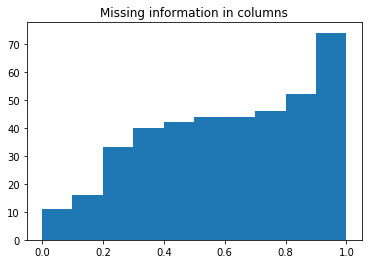

In [16]:
plt.hist(d.describe().iloc[0]/len(y), cumulative = True, density = False, histtype = 'stepfilled');
plt.title('Missing information in columns');

In [17]:
df = d
df['type'] = pd.DataFrame(y).set_index(df.index)
weights = np.array(df.drop('type', axis =1).isnull().groupby(df.type).count())
df = df.drop('type', axis =1).isnull().groupby(df.type).mean()

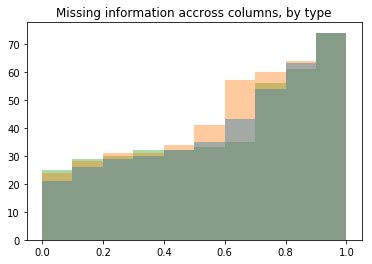

In [18]:
plt.hist(np.array(df).T, cumulative = True, density = False, histtype='stepfilled', alpha = .4);
plt.title("Missing information accross columns, by type");
# Note: There is an overlap, so it does not make sense to just stack the histograms

In [19]:
df

,turnover,export,cost_of_sales,gross_profit,wages_and_salaries,director_emoluments,operating_profit,depreciation,auditfees,interest_payments,...,operating_costs_as_pct_gp,operating_costs_per_employee,operating_profit_pct,profit_after_tax_per_employee,gross_profit_pct,profit_after_tax_pct,profit_after_tax_as_pct_operating_costs,difference,revenue_growth_pct,dividends
type,,,,,,,,,,,,,,,,,,,,,
ISV,0.627574,0.880931,0.708147,0.700090,0.675918,0.744852,0.782453,0.187108,0.666965,0.790510,...,0.820949,0.843330,0.630260,0.799463,0.688451,0.606088,0.820949,1.0,1.000000,1.0
MSP,0.509804,0.911765,0.544118,0.544118,0.612745,0.622549,0.651961,0.107843,0.637255,0.612745,...,0.661765,0.725490,0.514706,0.730392,0.519608,0.500000,0.661765,1.0,0.965686,1.0
Reseller,0.722598,0.907984,0.734777,0.733424,0.769959,0.776725,0.763194,0.127199,0.767253,0.803789,...,0.771313,0.813261,0.722598,0.801083,0.730717,0.718539,0.771313,1.0,0.967524,1.0


count    1.990000e+03
mean     1.738939e+07
std      1.269593e+08
min      1.000000e+00
25%      2.617790e+05
50%      1.095744e+06
75%      4.182539e+06
max      3.341237e+09
Name: total_assets, dtype: float64


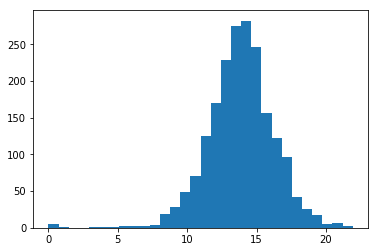

In [20]:
np.array([d[u'tangible_assets'].isnull(), d[u'intangible_assets'].isnull(), d[u'total_assets'].isnull()]).mean(axis = 1)
# Conclusion: work with total assets
print d[u'total_assets'].describe()
plt.hist(np.log(d[u'total_assets'][d[u'total_assets'].notnull()]), 30);

count     2060.000000
mean        27.680015
std       1086.055466
min          0.000000
25%          0.860000
50%          1.270000
75%          2.062500
max      49272.000000
Name: liquidity_acid_test, dtype: float64

Zeros:  0.0519417475728


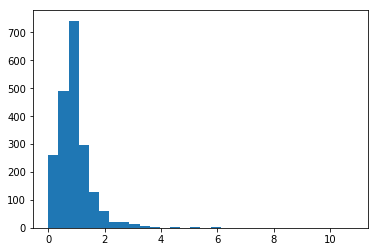

In [21]:
d[u'liquidity_acid_test'].isnull().mean()
# Conclusion: work with liquidity test
print d[u'liquidity_acid_test'].describe()
print "\nZeros: ", np.mean(d[u'liquidity_acid_test']==0)
plt.hist(np.log(d[u'liquidity_acid_test']+1), 30);

count    2060.000000
mean       11.323345
std       118.346151
min      -212.690000
25%         0.160000
50%         0.980000
75%         2.805000
max      2887.200000
Name: total_debt_ratio, dtype: float64

Negatives:  0.166990291262
Zeros:  0.0456310679612


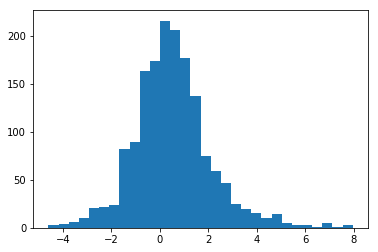

In [22]:
# Conclusion: work with debt ratio
print d[u'total_debt_ratio'].describe()
print "\nNegatives: ", np.mean(d[u'total_debt_ratio'] < 0)
print "Zeros: ", np.mean(d[u'total_debt_ratio'] == 0)

plt.hist(np.log(d[u'total_debt_ratio'][d[u'total_debt_ratio']>0]), 30);

count    1.649000e+03
mean     8.292499e+06
std      5.399513e+07
min      1.000000e+00
25%      1.058130e+05
50%      4.544100e+05
75%      1.760258e+06
max      1.100500e+09
Name: shareholder_funds, dtype: float64
Nulls:  0.199514563107


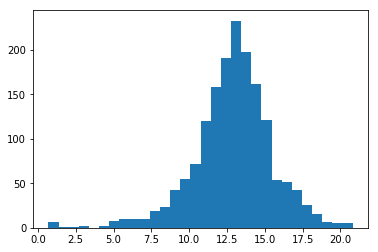

In [23]:
print d[u'shareholder_funds'].describe()
print "Nulls: ",d[u'shareholder_funds'].isnull().mean()

plt.hist(np.log(d[u'shareholder_funds'][d[u'shareholder_funds'].notnull()]+1), 30);

count    1.747000e+03
mean     1.163389e+07
std      8.941281e+07
min      1.000000e+00
25%      1.160350e+05
50%      5.364740e+05
75%      2.032410e+06
max      2.580687e+09
Name: capital_employed, dtype: float64


(array([   7.,    0.,    2.,    1.,    0.,    2.,    6.,    8.,   10.,
          16.,   24.,   28.,   47.,   65.,  106.,  166.,  169.,  237.,
         253.,  197.,  144.,   80.,   67.,   47.,   26.,   16.,   11.,
           2.,    9.,    1.]),
 array([  0.69314718,   1.39241966,   2.09169214,   2.79096463,
          3.49023711,   4.18950959,   4.88878207,   5.58805455,
          6.28732703,   6.98659952,   7.685872  ,   8.38514448,
          9.08441696,   9.78368944,  10.48296193,  11.18223441,
         11.88150689,  12.58077937,  13.28005185,  13.97932433,
         14.67859682,  15.3778693 ,  16.07714178,  16.77641426,
         17.47568674,  18.17495923,  18.87423171,  19.57350419,
         20.27277667,  20.97204915,  21.67132163]),
 <a list of 30 Patch objects>)

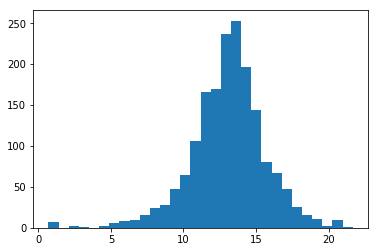

In [24]:
print d[u'capital_employed'].describe()
plt.hist(np.log(d[u'capital_employed'][d[u'capital_employed'].notnull()]+1), 30)

count    1.854000e+03
mean     2.166761e+06
std      8.916164e+06
min      1.000000e+00
25%      8.880950e+04
50%      3.504795e+05
75%      1.232716e+06
max      1.518397e+08
Name: trade_debtors, dtype: float64

Nulls:  0.1


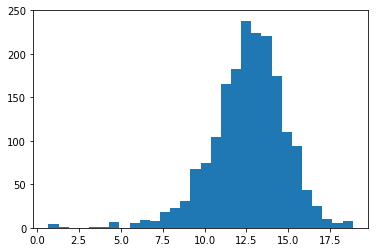

In [25]:
var = u'trade_debtors'
print d[var].describe()
print "\nNulls: ",d[var].isnull().mean()

plt.hist(np.log(d[var][d[var].notnull()]+1), 30);

count    1.923000e+03
mean     1.304622e+06
std      6.082992e+06
min      2.000000e+00
25%      6.943650e+04
50%      2.348170e+05
75%      7.755740e+05
max      1.590520e+08
Name: trade_creditors, dtype: float64

Nulls:  0.0665048543689


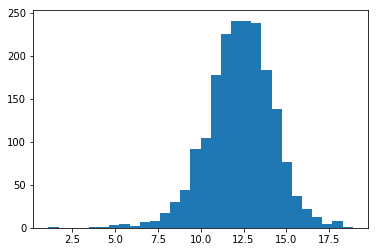

In [26]:
var = u'trade_creditors'
print d[var].describe()
print "\nNulls: ",d[var].isnull().mean()

plt.hist(np.log(d[var][d[var].notnull()]+1), 30);

count    1.747000e+03
mean     1.163389e+07
std      8.941281e+07
min      1.000000e+00
25%      1.160350e+05
50%      5.364740e+05
75%      2.032410e+06
max      2.580687e+09
Name: capital_employed, dtype: float64

Nulls:  0.151941747573


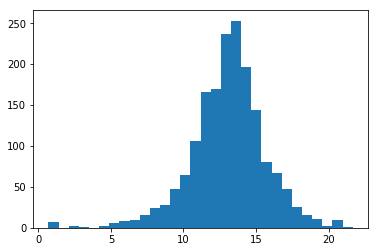

In [27]:
var = u'capital_employed'
print d[var].describe()
print "\nNulls: ",d[var].isnull().mean()

plt.hist(np.log(d[var][d[var].notnull()]+1), 30);

In [28]:
d[u'number_of_employees'].isnull().mean()
d[u'operating_costs_per_employee'].isnull().mean()
d[u'operating_costs'].isnull().mean()
d[u'gross_profit'].isnull().mean()
d[u'operating_profit'].isnull().mean()

0.76262135922330099